# Plot a confusion matrix

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from datetime import datetime

Data is captured after a training run and imported from a CSV. This prevents loss of model training data when the runtime terminates or the kernel crashes. Neither TensorFlow or Keras appear to provide access to model history from a loaded model.

In [3]:
# Sample data
pred1 = ['Watching TV', [['Watching TV', 0.9], ['Sitting in Wheelchair', 0.1], 
                         ['EVS Visit', 0.06], ['Asleep Trying to sleep', 0.8], 
                         ['Doctor Visit', 0.0], ['Therapy', 0.01], 
                         ['Eating', 0.02], ['Nurse Visit', 0.5], 
                         ['Talking on the Phone', 0.4],['Lying In Bed', 0.04], 
                         ['Brought Back From Therapy (Transfer To Bed)', 0.5],
                         ['Family', 0.05]]
                         ]

pred2 = ['Doctor Visit', [['Doctor Visit', 0.9], ['Watching TV', 0.1], 
                          ['Sitting in Wheelchair', 0.0],['EVS Visit', 0.06],
                          ['Asleep Trying to sleep', 0.8], ['Therapy', 0.01],
                          ['Eating', 0.02], ['Nurse Visit', 0.5], 
                          ['Talking on the Phone', 0.4],['Lying In Bed', 0.04], 
                          ['Brought Back From Therapy (Transfer To Bed)', 0.5],
                          ['Family', 0.0]]
                          ]

In [9]:
# Import CSV of all predictions from a training run
df = pd.read_csv('../data/2024-09-21-all_predictions.csv')

# Rename columns: 
df = df.rename(columns={"true_class": "True labels", 
                        "predicted_class": "Predicted labels",
                        "predicted_value": "Predicted value"
                        })

# Filter data by top predictions
top_predictions = df.iloc[::12, :].reset_index(drop=True)

# Display DataFrame
top_predictions

,True labels,Predicted labels,Predicted value
0,EVS Visit,Sitting In Wheelchair,0.81
1,EVS Visit,Nurse Visit,0.72
2,EVS Visit,Nurse Visit,0.49
3,EVS Visit,Nurse Visit,0.71
4,EVS Visit,Nurse Visit,0.97
...,...,...,...
442,Nurse Visit,Asleep-Trying to sleep,0.86
443,Nurse Visit,Sitting In Wheelchair,0.59
444,Nurse Visit,Therapy,0.60
445,Transfer To Bed,Transfer To Bed,1.00


In [10]:
# Select true and predicted labels
true_classes = top_predictions['True labels']
predicted_classes = top_predictions['Predicted labels']

In [11]:
# Make classification report
report = classification_report(true_classes, predicted_classes)
print(report)

                        precision    recall  f1-score   support

Asleep-Trying to sleep       0.72      0.31      0.43       158
          Doctor Visit       0.00      0.00      0.00         1
             EVS Visit       0.00      0.00      0.00         5
                Eating       0.32      0.19      0.24        36
                Family       1.00      0.33      0.50         9
          Lying In Bed       0.25      0.03      0.05        33
           Nurse Visit       0.17      0.42      0.24        48
 Sitting In Wheelchair       0.29      0.29      0.29        28
  Talking on the Phone       0.12      0.17      0.14        18
               Therapy       0.03      1.00      0.06         2
       Transfer To Bed       0.02      1.00      0.04         2
           Watching TV       0.00      0.00      0.00       107

              accuracy                           0.21       447
             macro avg       0.24      0.31      0.17       447
          weighted avg       0.36     

/Users/jamescole/Docs-unsynced/Dev/PAM/activity-recog/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jamescole/Docs-unsynced/Dev/PAM/activity-recog/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jamescole/Docs-unsynced/Dev/PAM/activity-recog/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [12]:
# Function to plot confusion matrix. This prevents the notebook from printing the plot twice.
def plot_confusion(t_class, p_class, color_map, title, title_size, label_size, tick_size):
    fig, ax = plt.subplots(figsize=(7,7))

    plt.title(title, fontsize = title_size)
    plt.xticks(fontsize = tick_size)
    plt.yticks(fontsize = tick_size)
    plt.ylabel("True label", fontsize = label_size)
    plt.xlabel("Predicted label", fontsize = label_size)

    cm = ConfusionMatrixDisplay.from_predictions(t_class, 
                                                 p_class, 
                                                 cmap=color_map)

    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position()
                        .y0,0.02,ax.get_position().height])

    cm.plot(ax=ax, colorbar=False, 
            xticks_rotation='vertical', 
            cmap=color_map)
    
    plt.colorbar(cm.im_, cax=cax)
   
    plt.close()
    
    return fig

/var/folders/_9/4g32l3792w94_gk4_16tnt7c0000gn/T/ipykernel_93933/1032847325.py:22: UserWarning: Adding colorbar to a different Figure <Figure size 700x700 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  plt.colorbar(cm.im_, cax=cax)


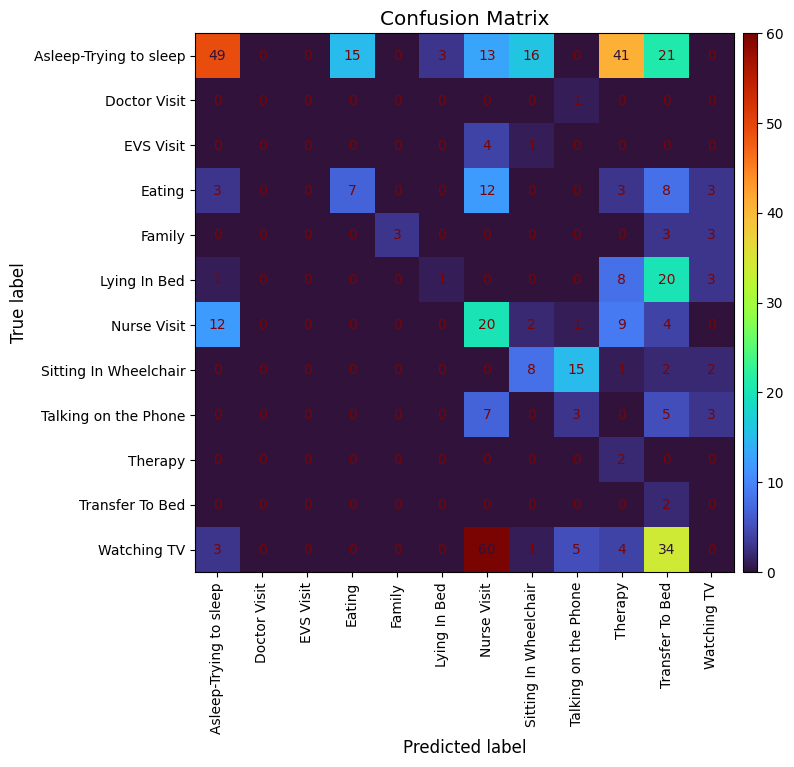

In [13]:
# Define plot design
colors = 'turbo'
title = 'Confusion Matrix'
title_size = 'x-large'
tick_size = 'medium'
label_size = 'large'

# Make the plot
confusion_matrix = plot_confusion(true_classes, 
                                  predicted_classes, 
                                  color_map = colors,
                                  title = title,
                                  title_size = title_size,
                                  tick_size = tick_size,
                                  label_size = label_size)

## References
- [Resize confustion matrix](https://stackoverflow.com/questions/66483409/adjust-size-of-confusionmatrixdisplay-scikitlearn)
- [MPL colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html)
- [Classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)